# Least Mean Square Algorithm for the Boston housing prices data set

by 

[__Michael Granitzer__ (michael.granitzer@uni-passau.de)]( http://www.mendeley.com/profiles/michael-granitzer/)


__License__

This work is licensded under a [Creative Commons Attribution 3.0 Unported License](http://creativecommons.org/licenses/by/3.0/)




## Introduction and Aims of the Tutorial

This example demonstrates the implementation of a simple, gradient descent based Least Mean Square algorithm for fitting the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing). 

We will use Numpy,Mathplotlib/Pylab and scikit-learn (mainly for loading the data set and some small cross-validation) to implement the LMS Algorithm and evaluate it.  

A large bunch of Machine Learning theory could be developed around the LMS Algorithm. However this tutorial aims more on the practical side. In particular you should learn the following points:

* Given a set of data points, how can we learn a predictor for extrapolating unkown data points?
* What are the properties of an iterative, stoachstic algorithm like the LMS for doing so?
* What is the workflow for doing data anaylsis?
* How to estimate the goodness of fit of a found predictor?
* How to find suitable parameters for a problem?

I hope you will enjoy this tutorial


## Setting up IPython Notebook
The code below simply sets up ipython notebook and displays graphs inline (e.g. as HTML)

In [24]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
import numpy as np
import sklearn.datasets as datasets
ds = datasets.load_boston()

In [26]:
#that is the data 
ds.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [27]:
#it has 13 attributes or features and 506 data points
ds.data.shape

(506, 13)

In [28]:
#and here are the feautre names. note that the last feature name is the target
ds.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [29]:
#here are the target values for the 506 data points
ds.target.shape

(506,)

/root/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

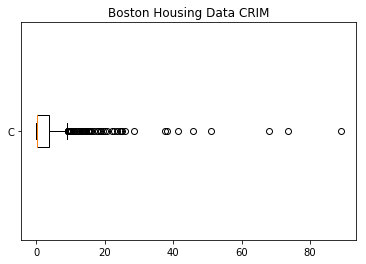

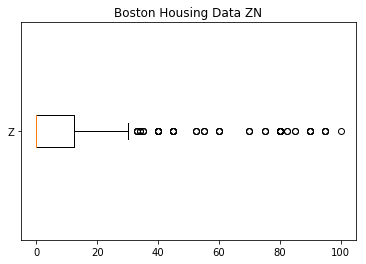

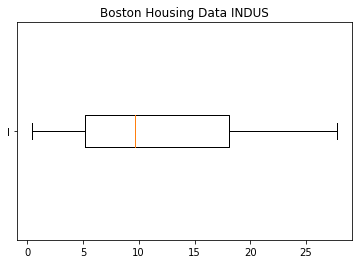

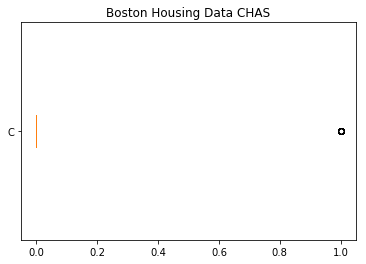

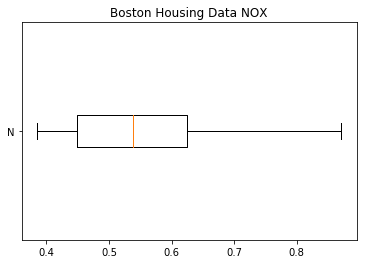

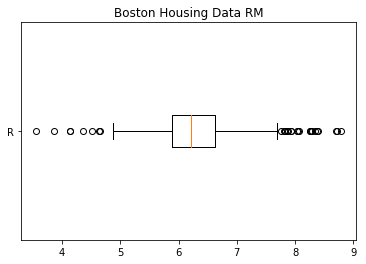

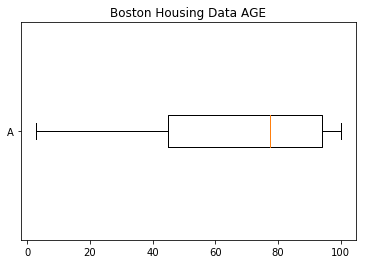

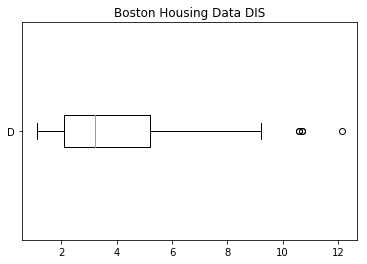

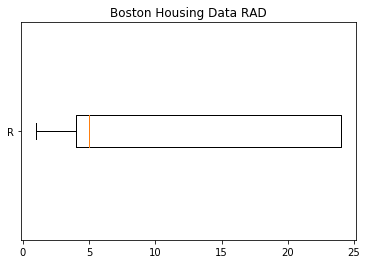

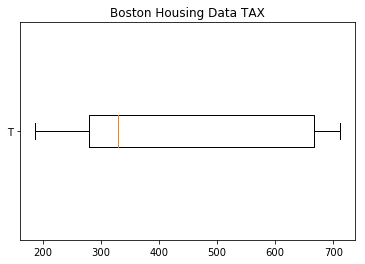

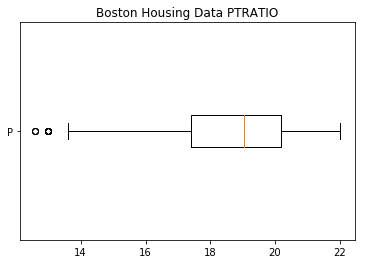

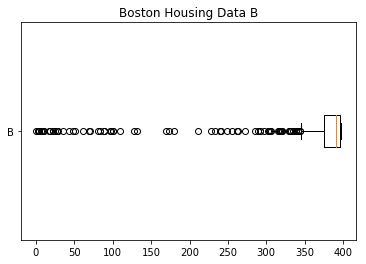

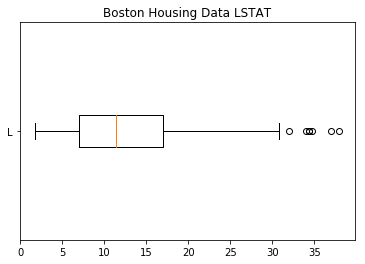

In [30]:

for i in range(ds.data.shape[1]):
    fig = figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.boxplot(ds.data[:,i],vert=False)
    ax1.set_title("Boston Housing Data "+ds.feature_names[i])
    ax1.set_yticklabels(ds.feature_names[i])
    fig.show()

print (ds.DESCR[:1236])

## The LMS Function
Now lets code the LMS function as outlined in the [Data Mining and Machine Learning slides, pg ML:I-30](http://www.uni-weimar.de/medien/webis/teaching/lecturenotes/machine-learning/unit-en-ml-introduction.pdf) 

In [31]:

def lms(data,eta=0.1, iterations=1000, bias=True):
    """
    data: tuple containing the data matrix x and target values c(x)
    eta: learning rate. default is 0.1
    bias: True, if a bias term should be included
    iterations: do some fixed amount of iterations. no need for more sophisticated stopping criterions
    """
    target = data[1]
    data = data[0]
    dim = data.shape[1]         # get the number of attributes/features
    num_points = data.shape[0]
    if bias:                    # when considering the bias term we have to add w_0
        dim+=1
        data = np.concatenate(
                [
                 data, 
                 np.ones(num_points).reshape(num_points,1)
                ]
                ,axis=1)    # add bias term as attribute with value 1 for every data point
    w = np.ones(dim)    # that is the weight vector as column vector    
    for i in range(iterations):
        next = np.random.randint(num_points)  #next example to work on
        predict = np.dot(data[next,],w)       #predict the value of next based on the current hypothesis
        error = target[next]-predict          # estimate the error
        w = w + eta*error*data[next,]         # inner loop is done by numpy
    
    return w
        


### Remarks on the Implemtation
  * be careful with the shapes and operations on matrices. Numpy makes a number of implicit assumption and forgives a lot when sizes do not fit perfectly (see broadcasting of numpy arrays).
    * for example in the lms function replace `np.dot(data,w)` with `data*w` and you will do elementwise multiplication (compare array vs. matrix)

## Application of the LMS to Toy Data
Now lets do a toy example to see whether lms works

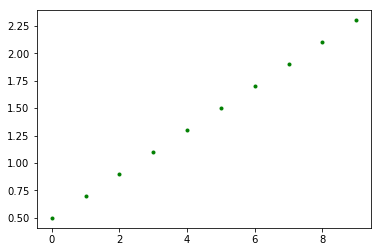

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [32]:
#create data and plot it
toy = np.arange(10).reshape((10,1))
target = toy*0.2 + 0.5
plot (toy,target,'g.')
show()
print (toy)

In [33]:
#run lms with parameters that work (see practical tips)
data_zipped = (toy,target)
print (lms(data_zipped,iterations=10000,eta=0.001))

[ 0.19660566  0.52164167]


### Remarks on Parameter Settings
   * In the run above we get close, but do not find the correct solution. Increasing the number of iterations leads to the correct solution if $\eta$ is small enough. 
   * chosing $\eta$ larger needs less iteraionts. However, a too large $\eta$ yields too large updates and the lms algorithm might diverges. So eta must be sufficiently small

In [34]:
#lms with increased iterations. eta is small enough so we find a solution
data_zipped = (toy,target)
print (lms(data_zipped,iterations=50000,eta=0.01))

[ 0.2  0.5]


In [35]:
#lms with increased eta. we find the correct solutions
data_zipped = (toy,target)
print (lms(data_zipped,iterations=10000,eta=0.051))

[ 0.2  0.5]


In [36]:
#eta is to large. lms diverges. Data normalization would help a lot here
data_zipped = (toy,target)
print (lms(data_zipped,iterations=10000,eta=0.08)) 

[ nan  nan]


/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in add


[ 0.15689213  0.76464543]


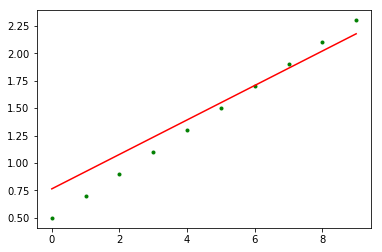

In [37]:
w = lms(data_zipped,iterations=1000,eta=0.001)
plot(toy,target,'g.')
plot(toy,toy*w[0]+w[1],'r')
print (w)
show()

In [38]:
data_zipped = (ds.data,ds.target)
w = lms(data_zipped,iterations=100000,eta=0.000001)
print ("Weights:", w)
print ("Some better output (using python magic)")
for (feature,weight) in zip(ds.feature_names[0:12].tolist()+["w0"],w): print (feature,"\t",weight)

Weights: [-0.12605615  0.09586975  0.29789608  1.02237943  1.00136728  1.2890789
  0.09755324  0.73067527  0.52287419 -0.02696335  0.4710072   0.01778727
 -0.77648856  1.00771562]
Some better output (using python magic)
CRIM 	 -0.126056148266
ZN 	 0.0958697496041
INDUS 	 0.297896079126
CHAS 	 1.02237942663
NOX 	 1.00136728259
RM 	 1.28907890329
AGE 	 0.0975532362058
DIS 	 0.730675271428
RAD 	 0.522874190473
TAX 	 -0.0269633545828
PTRATIO 	 0.471007203869
B 	 0.0177872689782
w0 	 -0.776488557937


Again, we have to tune $\eta$ in order to avoid divergence. This strongly depends on the scale of the attributes, i.e. large attributes yield large updates. So lets take a look on the scale of the attributes:

In [39]:
print (ds.feature_names)
print (np.min(ds.data,axis=0))
print (np.max(ds.data,axis=0))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[  6.32000000e-03   0.00000000e+00   4.60000000e-01   0.00000000e+00
   3.85000000e-01   3.56100000e+00   2.90000000e+00   1.12960000e+00
   1.00000000e+00   1.87000000e+02   1.26000000e+01   3.20000000e-01
   1.73000000e+00]
[  88.9762  100.       27.74      1.        0.871     8.78    100.
   12.1265   24.      711.       22.      396.9      37.97  ]


In [40]:
X = ds.data
Y = ds.target
X_scaled = (X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))
print (X_scaled)

[[  0.00000000e+00   1.80000000e-01   6.78152493e-02 ...,   2.87234043e-01
    1.00000000e+00   8.96799117e-02]
 [  2.35922539e-04   0.00000000e+00   2.42302053e-01 ...,   5.53191489e-01
    1.00000000e+00   2.04470199e-01]
 [  2.35697744e-04   0.00000000e+00   2.42302053e-01 ...,   5.53191489e-01
    9.89737254e-01   6.34657837e-02]
 ..., 
 [  6.11892474e-04   0.00000000e+00   4.20454545e-01 ...,   8.93617021e-01
    1.00000000e+00   1.07891832e-01]
 [  1.16072990e-03   0.00000000e+00   4.20454545e-01 ...,   8.93617021e-01
    9.91300620e-01   1.31070640e-01]
 [  4.61841693e-04   0.00000000e+00   4.20454545e-01 ...,   8.93617021e-01
    1.00000000e+00   1.69701987e-01]]


/root/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


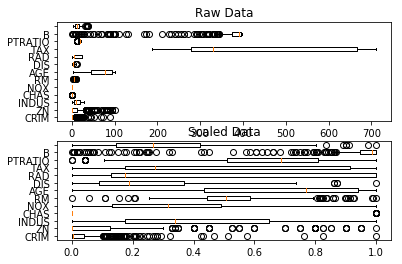

In [41]:
fig = figure()
ax1 = fig.add_subplot(2,1,1)
ax1.boxplot(X,vert=False)
ax2 = fig.add_subplot(2,1,2)
ax2.boxplot(X_scaled,vert=False)
ax2.set_title("Scaled Data")
ax1.set_title("Raw Data")
ax2.set_yticklabels(ds.feature_names[0:12])
ax1.set_yticklabels(ds.feature_names[0:12])
fig.show()

In [42]:
data_zipped = (X_scaled,ds.target)
w = lms(data_zipped,iterations=100000,eta=0.001)
print ("Weights:", w)
print ("Some better output (using python magic)")
for (feature,weight) in zip(ds.feature_names[0:12].tolist()+["w0"],w): print (feature,"\t",weight)

Weights: [ -3.21230269   3.06350276  -0.42779812   3.40244905  -3.01938206
  24.14130789   1.28638878  -6.56782124   4.09965253  -3.75130918
  -7.50888572   5.99451679 -17.47496523  15.98072883]
Some better output (using python magic)
CRIM 	 -3.21230268757
ZN 	 3.06350276086
INDUS 	 -0.427798115678
CHAS 	 3.40244904539
NOX 	 -3.0193820604
RM 	 24.1413078858
AGE 	 1.28638878462
DIS 	 -6.5678212431
RAD 	 4.09965252588
TAX 	 -3.75130918217
PTRATIO 	 -7.50888571698
B 	 5.99451678681
w0 	 -17.4749652304


### Parameter Stability and Goodness of Fit

Playing with $\eta$ a little bit shows, that it yields to quite different solution. Moreover, the stochastic nature of the algorithm yields different solution when run with the same parameters. For example

In [43]:
w = lms(data_zipped,iterations=100000,eta=0.001)
print ("Some better output (using python magic)")
for (feature,weight) in zip(ds.feature_names[0:12].tolist()+["w0"],w): print (feature,"\t",weight)

Some better output (using python magic)
CRIM 	 -3.226138894
ZN 	 2.72083580833
INDUS 	 -0.270988017358
CHAS 	 3.18253674777
NOX 	 -2.77157175578
RM 	 24.281500321
AGE 	 1.12402581735
DIS 	 -6.33918489653
RAD 	 3.87596390421
TAX 	 -3.86350496285
PTRATIO 	 -7.64770194115
B 	 5.8487093792
w0 	 -17.1434571266


This gets worser when the number of attributes gets higher (i.e. curse of dimensionality). The number of needed example for a good fit grows more than linearly (in some cases exponentially) with the number of examples.

This raises two questions

 * How stable are parameters? 
 
   This depends on the algorithm at hand and will be discussed in other chapters.
   
   
 * What consitutes a good solution?
    
    There are several measures for the goodness of fit. We will explore the average Residual Sum of Squares. It is the average squared deviation of the predicted from the target value  ( also known as the more general concept of the Mean Squared error (MSE))
    


In [44]:
#Technical Detail: do it without the bias term. otherwise we need to extend the data
w = lms(data_zipped,iterations=100000,eta=0.1,bias=False) 

def calc_gof(X,w,target):
    return np.mean((np.dot(X_scaled,w)-target)**2)
gof = calc_gof(X_scaled,w,ds.target)
print ("Goodness of Fit=%f, Standard-deviation=%f"%(gof,sqrt(gof)))

Goodness of Fit=28.863435, Standard-deviation=5.372470


Now we can measure the goodness of fit for several $\eta$


[107.08904705598655, 28.904367635501664, 49.206414711923749, 107.19411353752523, 291.07079828031289, 388.82802897459828]


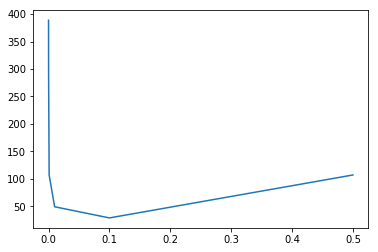

In [45]:
etas = [0.5, 0.1,0.01,0.001,0.0001,0.00001]
gofs = []
for eta in etas:
    w = lms(data_zipped,iterations=1000,eta=eta,bias=False)
    gofs.append(calc_gof(X_scaled,w,ds.target))

plot(etas,gofs) #plotting comparing different etas and their goodness of fit
print (gofs)

And several iterations (with a fixed eta from before)

[104.09203800334487, 53.958085496963477, 29.60168901529924, 31.785075490642434, 48.096862210428021, 31.082679092509938, 31.780441933844362, 33.944548497873136]


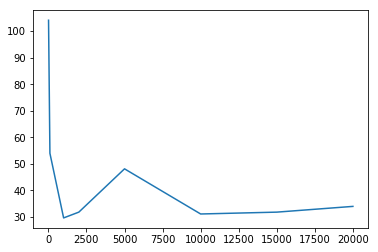

In [46]:
iterations = [10,100,1000,2000,5000,10000,15000,20000]
gofs = []
for iteration in iterations:
    w = lms(data_zipped,iterations=iteration,eta=0.1,bias=False)
    gofs.append(calc_gof(X_scaled,w,ds.target))
print (gofs)
plot(iterations,gofs) #plotting comparing different etas and their goodness of fit

Note that the LMS algorithm with a stochastic gradient descent is not detrministic. So the behaviour might change.

## Summary

Finding good parameter is the usual job in data mining. So this tutorial should give an idea of the LMS and the application to fit data. The principals are the same for nearly every machine learning/data mining problem. Just the tools, and most improtantly, the data changes.

A large bunch of the Machine Learning Theory can be developed around the LMS Algorithms and we will do so later on. For now the basic steps should be sufficient. In Summary we did the following points here

  * We developed an algorithm that **iteratively** adjusts the parameters towards and optimal solution. The updates follow the gradient of the error surface in a stochastic manner, that's why such algorithms are called **Stochastic Gradient Descent (SGD)** algorithms. Theory comes later
  * We saw that **parameter settings** play an important role, in our case especially $eta$. To small yields long runtimes, to large yields to oscillation around the correct solution and potentially to divergence.
  * In small scale examles we are able to plot the data points. However, when the number of attributes grow we cannot do this anymore. We need another way of estimating **the goodness of fit** of our model to the data. in our example we used the mean of the squared difference between prediction and true target. This **Mean Squared Error** has a lot of theoretical advantages, which will be discussed later on.